# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

** Import visualization libraries and set %matplotlib inline. **

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [10]:
df['Reason'] = df['title'].apply(lambda x: x[:3])

In [12]:
df['Reason']

0        EMS
1        EMS
2        Fir
3        EMS
4        EMS
        ... 
99487    Tra
99488    Tra
99489    EMS
99490    EMS
99491    Tra
Name: Reason, Length: 99492, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [19]:
df['Reason'].value_counts()

EMS    48877
Tra    35695
Fir    14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

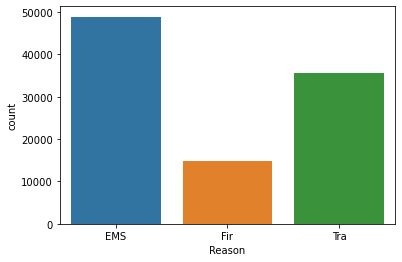

In [22]:
sns.countplot(x='Reason',data=df)

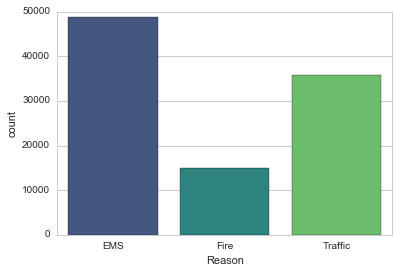

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Day          99492 non-null  int64         
 12  Day of Week  99492 non-null  object        
 13  Month        99492 non-null  int64         
 14  Date         99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)

In [27]:
type(df['timeStamp'][0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [38]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [39]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [40]:
time = df['timeStamp'].iloc[0]

In [76]:
time.date()

datetime.date(2015, 12, 10)

In [57]:
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [48]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [42]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [58]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [59]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [60]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [61]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

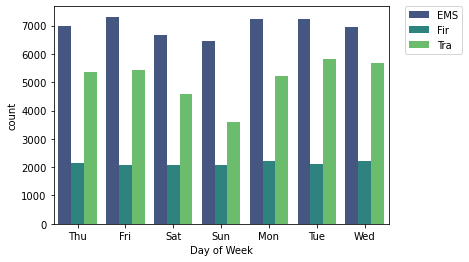

In [64]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

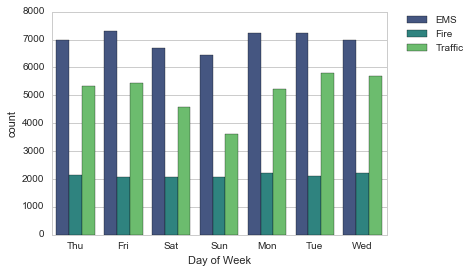

**Now do the same for Month:**

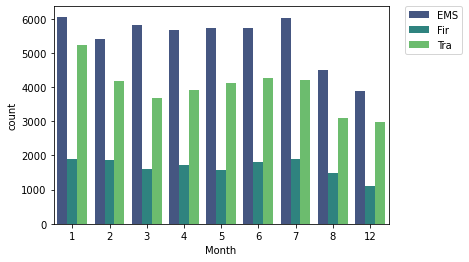

In [65]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

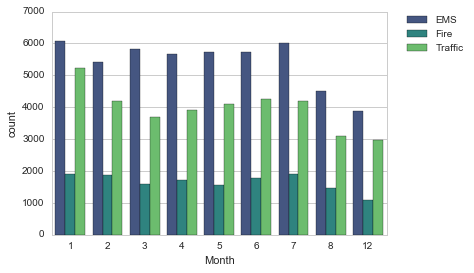

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [66]:
byMonth = df.groupby('Month').count()

In [68]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

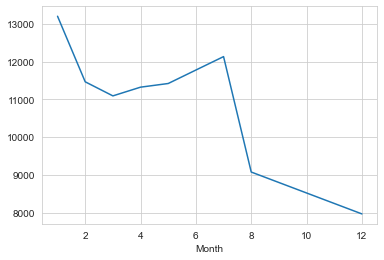

In [72]:
sns.set_style('whitegrid')
byMonth['twp'].plot()

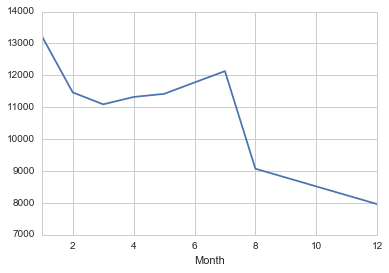

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

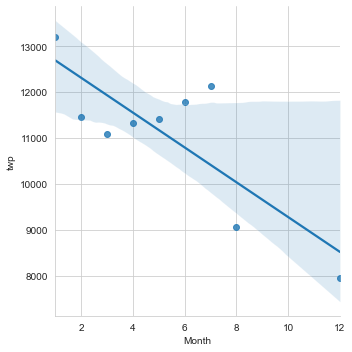

In [74]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

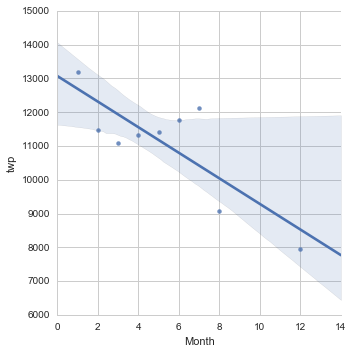

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [77]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [78]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [79]:
byDate= df.groupby('Date').count()

In [82]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Day of Week,Month
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


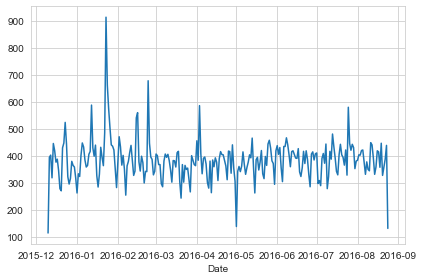

In [87]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

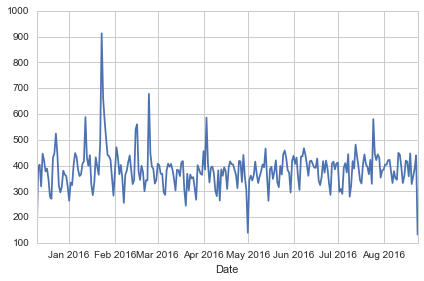

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

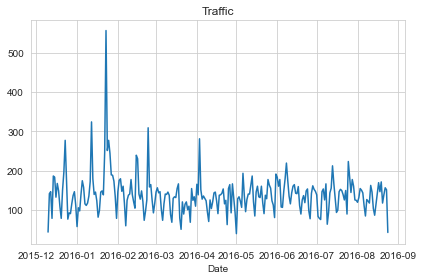

In [91]:
df[df['Reason']=='Tra'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

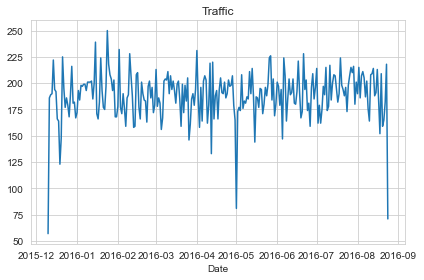

In [92]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

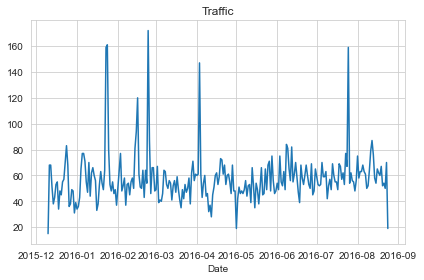

In [93]:
df[df['Reason']=='Fir'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

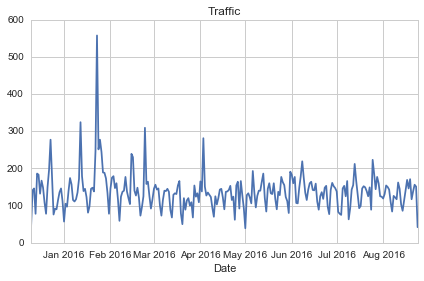

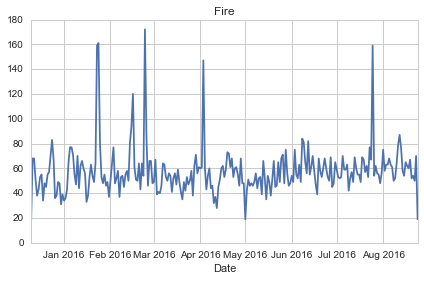

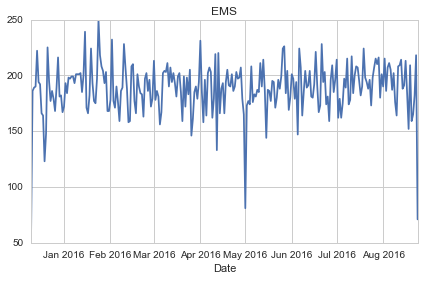

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [102]:
dfpv = df.pivot_table(index='Day of Week',columns='Hour')

In [106]:
dfpv

Day                                                         \
Hour                0          1          2          3          4          5    
Day of Week                                                                     
Fri          14.010909  14.570213  14.172775  14.502857  15.895522  14.628866   
Mon          16.418440  15.832579  16.830846  15.144330  16.416667  16.561798   
Sat          16.008000  16.126246  15.669202  16.126923  17.651786  16.251082   
Sun          16.644909  17.316993  16.325175  15.570896  15.574380  16.891667   
Thu          17.341727  16.841584  17.330472  17.157233  17.576923  16.891626   
Tue          15.234201  15.704167  15.978495  16.805882  16.937799  15.033473   
Wed          16.412000  16.962963  17.793651  17.162679  14.346154  16.203922   

                                                         ...           zip  \
Hour                6          7          8          9   ...            14   
Day of Week                                              ...                 
Fri          15.647849  14.367893  15.408356  14.901596  ...  19263.224010   
Mon          14.853904  14.996937  15.258852  15.697201  ...  19237.666229   
Sat          16.354086  16.189258  16.551198  16.240625  ...  19247.050222   
Sun          16.310000  15.485075  15.741201  15.303226  ...  19260.328947   
Thu          15.500000  16.585965  16.540541  16.275362  ...  19228.139842   
Tue          15.349398  14.242748  15.294713  15.656818  ...  19237.595383   
Wed          15.056098  14.741797  15.836571  16.143564  ...  19219.160102   

                                                                     \
Hour                   15            16            17            18   
Day of Week                                                           
Fri          19222.634524  19224.455964  19230.394673  19227.012605   
Mon          19251.859536  19214.561529  19232.640237  19241.408136   
Sat          19238.223043  19239.886686  19252.995378  19222.387906   
Sun          19243.486395  19251.172973  19233.750000  19253.165505   
Thu          19242.464976  19246.154430  19238.043779  19246.151344   
Tue          19218.497573  19228.153226  19232.868304  19228.076216   
Wed          19221.069737  19231.010465  19236.272418  19223.527886   

                                                                     \
Hour                   19            20            21            22   
Day of Week                                                           
Fri          19230.495130  19239.207381  19239.963340  19271.002247   
Mon          19236.961774  19251.369287  19242.511261  19244.875610   
Sat          19259.391517  19262.712727  19252.531496  19257.394678   
Sun          19238.368515  19233.421505  19246.489260  19268.443836   
Thu          19241.967213  19258.309392  19228.427966  19256.643258   
Tue          19243.144144  19217.276339  19263.678138  19249.540146   
Wed          19242.723729  19255.078727  19245.553150  19241.000000   

                           
Hour                   23  
Day of Week                
Fri          19217.222500  
Mon          19254.350340  
Sat          19253.395522  
Sun          19257.226148  
Thu          19244.478827  
Tue          19264.326531  
Wed          19234.894558  

[7 rows x 144 columns]

In [107]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

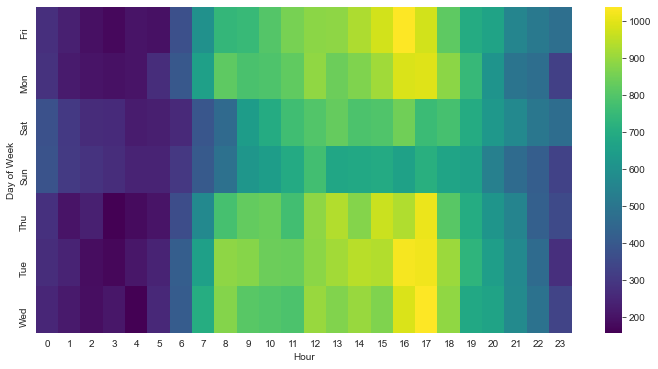

In [109]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

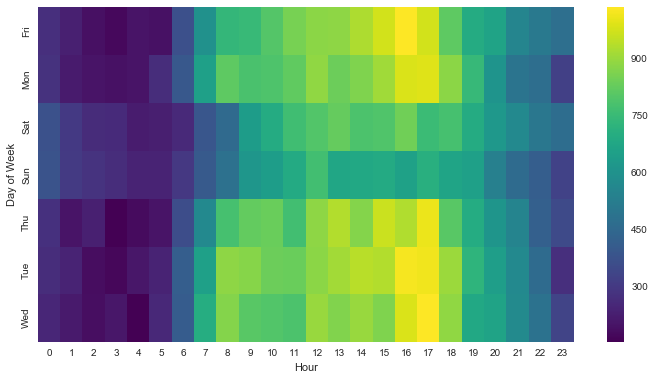

** Now create a clustermap using this DataFrame. **

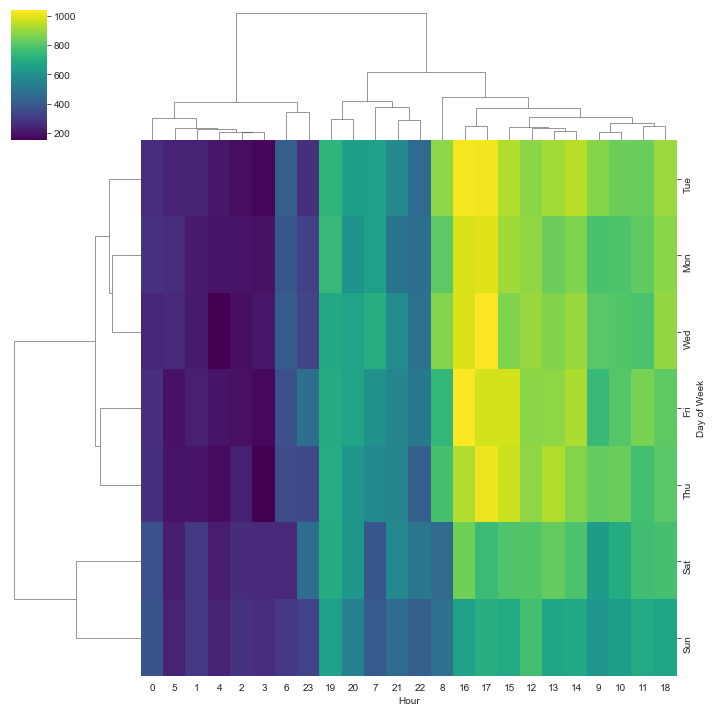

In [111]:
sns.clustermap(dayHour,cmap='viridis')

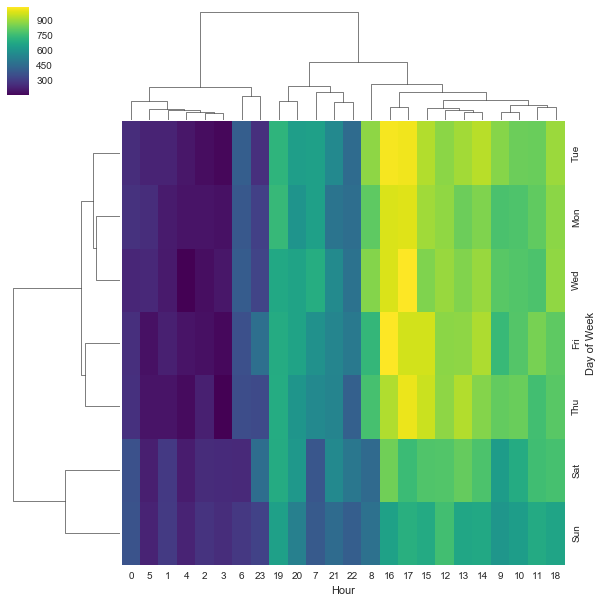

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [113]:
shmo = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
shmo.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


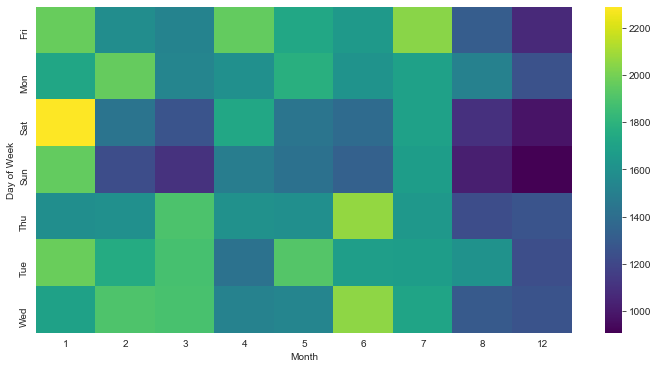

In [115]:
plt.figure(figsize=(12,6))
sns.heatmap(shmo,cmap='viridis')

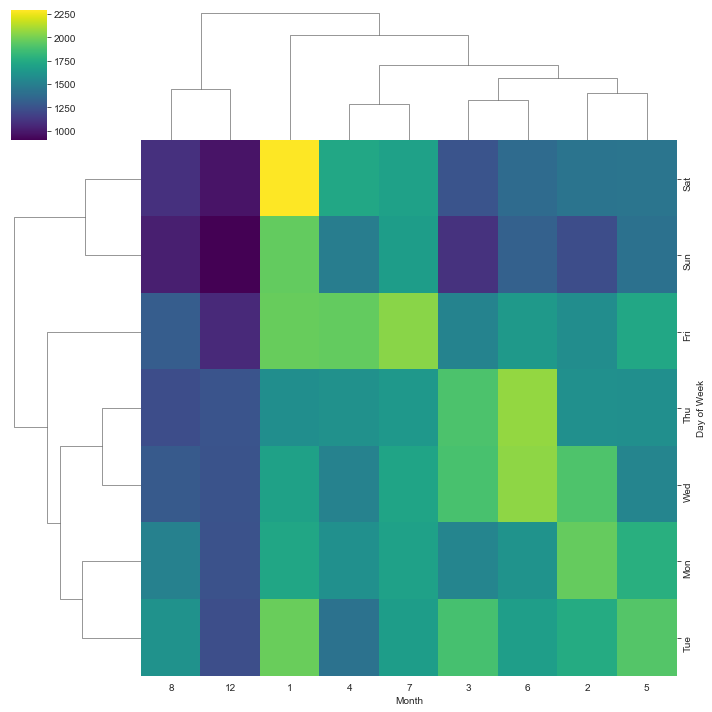

In [116]:
sns.clustermap(shmo,cmap='viridis')

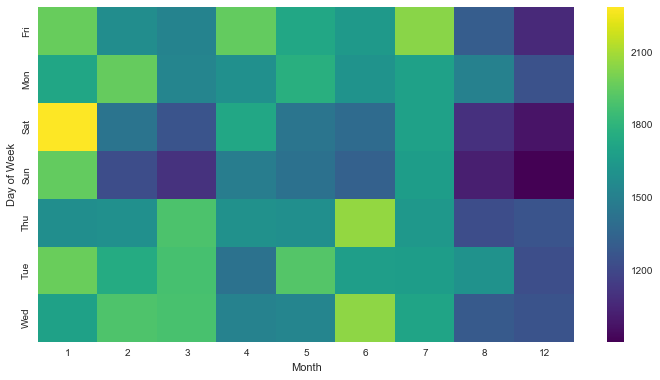

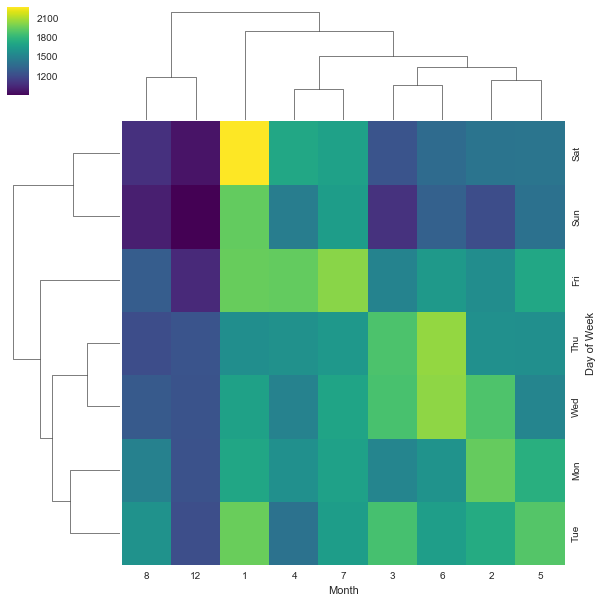

**Continue exploring the Data however you see fit!**
# Great Job!